### Author : Ibrahim Sobh, Anthony Al-Alam
## Tennis Championship Winner Prediciton project (2000-2018)

### I - Create Session and Read Data

In [1]:
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
spark = SparkSession.builder.appName('TennisChampionship').getOrCreate()

tennis_master = spark.read.option("delimiter", ",").csv("Data/df_atp.csv",header=True,inferSchema=True)

In [2]:
tennis_master.show(5)

+---+---+--------+--------------------+----------+-------------+-------+-------+---------+-------+-----------+--------------+-----+-----+---+---+---+---+----+----+----+----+----+----+-----+-----+---------+----+----+----+----+----+----+----+----+-----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|ATP|Location|          Tournament|      Date|       Series|  Court|Surface|    Round|Best of|     Winner|         Loser|WRank|LRank| W1| L1| W2| L2|  W3|  L3|  W4|  L4|  W5|  L5|Wsets|Lsets|  Comment| CBW| CBL| GBW| GBL| IWW| IWL| SBW| SBL|B365W|B365L|B&WW|B&WL| EXW| EXL| PSW| PSL|WPts|LPts| UBW| UBL| LBW| LBL| SJW| SJL|MaxW|MaxL|AvgW|AvgL|
+---+---+--------+--------------------+----------+-------------+-------+-------+---------+-------+-----------+--------------+-----+-----+---+---+---+---+----+----+----+----+----+----+-----+-----+---------+----+----+----+----+----+----+----+----+-----+-----+----+----+----+----+----+----+----+----+----+--

In [3]:
tennis_master.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ATP: integer (nullable = true)
 |-- Location: string (nullable = true)
 |-- Tournament: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Series: string (nullable = true)
 |-- Court: string (nullable = true)
 |-- Surface: string (nullable = true)
 |-- Round: string (nullable = true)
 |-- Best of: integer (nullable = true)
 |-- Winner: string (nullable = true)
 |-- Loser: string (nullable = true)
 |-- WRank: string (nullable = true)
 |-- LRank: string (nullable = true)
 |-- W1: double (nullable = true)
 |-- L1: double (nullable = true)
 |-- W2: string (nullable = true)
 |-- L2: string (nullable = true)
 |-- W3: string (nullable = true)
 |-- L3: string (nullable = true)
 |-- W4: double (nullable = true)
 |-- L4: double (nullable = true)
 |-- W5: double (nullable = true)
 |-- L5: double (nullable = true)
 |-- Wsets: double (nullable = true)
 |-- Lsets: string (nullable = true)
 |-- Comment: string (nullable = true)
 |-- CBW: do

In [4]:
tennis_data= tennis_master.alias('tennis_data')

In [5]:
tennis_data.show(5)

+---+---+--------+--------------------+----------+-------------+-------+-------+---------+-------+-----------+--------------+-----+-----+---+---+---+---+----+----+----+----+----+----+-----+-----+---------+----+----+----+----+----+----+----+----+-----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|ATP|Location|          Tournament|      Date|       Series|  Court|Surface|    Round|Best of|     Winner|         Loser|WRank|LRank| W1| L1| W2| L2|  W3|  L3|  W4|  L4|  W5|  L5|Wsets|Lsets|  Comment| CBW| CBL| GBW| GBL| IWW| IWL| SBW| SBL|B365W|B365L|B&WW|B&WL| EXW| EXL| PSW| PSL|WPts|LPts| UBW| UBL| LBW| LBL| SJW| SJL|MaxW|MaxL|AvgW|AvgL|
+---+---+--------+--------------------+----------+-------------+-------+-------+---------+-------+-----------+--------------+-----+-----+---+---+---+---+----+----+----+----+----+----+-----+-----+---------+----+----+----+----+----+----+----+----+-----+-----+----+----+----+----+----+----+----+----+----+--

### II - EDA Exploratory Data Analysis 

- ATP = Tournament number (men)
- WTA = Tournament number (women)
- Location = Venue of tournament
- Tournament = Name of tounament (including sponsor if relevant)
- Data = Date of match (note: prior to 2003 the date shown for all matches played in a single tournament is the start date)
- Series = Name of ATP tennis series (Grand Slam, Masters, International or - International Gold)
- Tier = Tier (tournament ranking) of WTA tennis series.
- Court = Type of court (outdoors or indoors)
- Surface = Type of surface (clay, hard, carpet or grass)
- Round = Round of match
- Best of = Maximum number of sets playable in match
- Winner = Match winner
- Loser = Match loser
- WRank = ATP Entry ranking of the match winner as of the start of the tournament
- LRank = ATP Entry ranking of the match loser as of the start of the tournament
- WPts = ATP Entry points of the match winner as of the start of the tournament
- LPts = ATP Entry points of the match loser as of the start of the tournament
- Wsets = Number of sets won by match winner
- Lsets = Number of sets won by match loser
______________
- Target : Match Winner. ( Look for Feature Engineering )


In [6]:
tennis_data.toPandas().describe(include = [np.number])

,_c0,ATP,Best of,W1,L1,W4,L4,W5,L5,Wsets,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
count,52298.000000,52298.000000,52298.000000,52035.000000,52037.000000,4731.000000,4731.000000,1791.000000,1791.000000,52074.000000,...,10671.000000,10671.000000,28131.000000,28142.000000,15572.000000,15579.000000,22745.000000,22745.000000,22745.000000,22745.000000
mean,26148.500000,33.222532,3.372366,5.794331,4.056229,5.777003,3.863454,6.637633,3.756002,2.141760,...,1.815867,3.542479,1.810226,3.451461,1.796538,3.557943,1.998610,8.326076,1.834821,3.594448
std,15097.276526,18.115493,0.778516,1.239577,1.845206,1.274712,1.895683,2.290596,2.817183,0.460311,...,0.996238,3.646316,1.031691,3.075889,1.004273,3.272510,1.628982,397.235666,1.107884,3.282610
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.010000,1.020000,1.000000,1.000000,1.000000,1.010000,1.010000,1.010000,1.010000,1.010000
25%,13074.250000,19.000000,3.000000,6.000000,3.000000,6.000000,2.000000,6.000000,2.000000,2.000000,...,1.240000,1.750000,1.250000,1.730000,1.220000,1.730000,1.290000,1.850000,1.240000,1.740000
50%,26148.500000,33.000000,3.000000,6.000000,4.000000,6.000000,4.000000,6.000000,3.000000,2.000000,...,1.500000,2.500000,1.500000,2.500000,1.500000,2.630000,1.570000,2.780000,1.500000,2.550000
75%,39222.750000,49.000000,3.000000,6.000000,6.000000,6.000000,6.000000,7.000000,5.000000,2.000000,...,2.030000,3.850000,2.000000,4.000000,2.000000,4.000000,2.200000,4.540000,2.060000,3.990000
max,52297.000000,69.000000,5.000000,7.000000,7.000000,7.000000,7.000000,70.000000,68.000000,3.000000,...,18.000000,60.000000,26.000000,51.000000,19.000000,81.000000,76.000000,42586.000000,23.450000,36.440000


In [7]:
tennis_data.toPandas().describe(include = ['O'])

,Location,Tournament,Date,Series,Court,Surface,Round,Winner,Loser,WRank,LRank,W2,L2,W3,L3,Lsets,Comment,EXW
count,52298,52298,52298,52298,52298,52298,52298,52298,52298,52283,52220,51526,51527,24169,24168,52073,52298,39411
unique,115,214,4650,8,2,4,8,948,1483,981,1465,17,17,17,17,7,5,367
top,Paris,US Open,2000-05-29,International,Outdoor,Hard,1st Round,Federer R.,Lopez F.,1.0,46.0,6.0,6.0,6.0,4.0,0.0,Completed,1.35
freq,3306,2413,127,12204,42941,27716,24212,1121,415,653,362,30103,11164,14362,4836,25396,50358,1321


# Data Visualization

### 1. Top 10 Players with Most wins

In [8]:
tennis_data.groupBy("Winner").count().sort("count",ascending=False).show(10)

winner_data=tennis_data.groupBy("Winner").count()\
            .sort("count",ascending=False).alias('tennis_data').limit(10)


+-----------+-----+
|     Winner|count|
+-----------+-----+
| Federer R.| 1121|
|   Nadal R.|  891|
|Djokovic N.|  802|
|  Ferrer D.|  691|
|  Murray A.|  624|
| Berdych T.|  580|
| Roddick A.|  577|
| Robredo T.|  518|
|  Hewitt L.|  514|
|Verdasco F.|  506|
+-----------+-----+
only showing top 10 rows



Text(0.5, 1.0, 'Top 10 Players of Tennis Championships between 2000-2018')

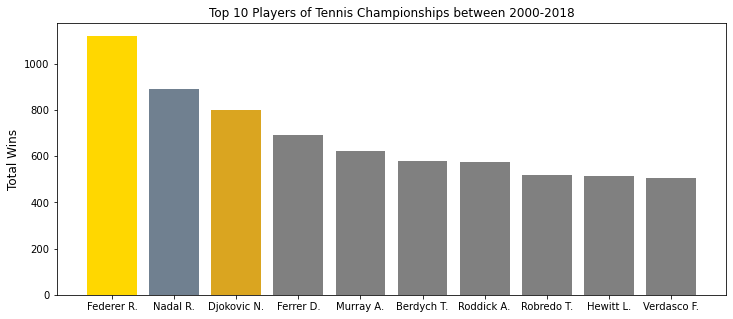

In [9]:
plt.figure(figsize = (12, 5))
colors=['Gold','slategray','goldenrod']+['grey']*7
plt.bar(winner_data.toPandas()["Winner"], winner_data.toPandas()["count"],color=colors)
plt.ylabel("Total Wins", size = 12)
plt.title("Top 10 Players of Tennis Championships between 2000-2018", size = 12)

In [10]:
def calculate_percentages_of_winnings(data):
    """_summary_
        # After grouping by tournaments

        # we have to caluclate for each player (winer) in match :
        # Winner winnings % = (winer_winings) /(winer_winings + winer_losses) * 100  [ To get the percentage of wins]

        # we have to caluclate for player (loser) in match :
        # Loser winnings % = (loser_winings) /(loser_winings + loser_losses) * 100  [ To get the percentage of wins]
    Args:
        data (_type_): _description_

    Returns:
        _type_: _description_
    """
    data['winner_number_of_winnings'] = data.groupby('Winner').cumcount()
    data['winner_number_of_losses'] = [(data.loc[0:i, 'Loser'] == data.loc[i, 'Winner']).sum() for i in data.index]
    data['loser_number_of_winnings'] = data.groupby('Loser').cumcount()
    data['loser_number_of_losses'] = [(data.loc[0:i, 'Winner'] == data.loc[i, 'Loser']).sum() for i in data.index]
    data['Winner winning %'] = (data['winner_number_of_winnings'] / (data['winner_number_of_winnings'] + data['winner_number_of_losses'])).round(4)*100
    data['Loser winning %'] = (data['loser_number_of_winnings'] / (data['loser_number_of_winnings'] + data['loser_number_of_losses'])).round(4)*100
    return data

# For each match / Per tournement, get the winner and loser and calculate the win % for each player
tennis_data_with_winning_percentages = tennis_data.toPandas().groupby('Tournament').apply(calculate_percentages_of_winnings).reset_index(drop=True)

In [11]:
tennis_data_plus=spark.createDataFrame(tennis_data_with_winning_percentages) 

In [12]:
tennis_data_plus.select(["Winner","Winner winning %","Loser winning %"]).tail(5)

[Row(Winner='Zverev A.', Winner winning %=40.0, Loser winning %=100.0),
 Row(Winner='Djokovic N.', Winner winning %=75.56, Loser winning %=81.82000000000001),
 Row(Winner='Zverev A.', Winner winning %=50.0, Loser winning %=20.830000000000002),
 Row(Winner='Djokovic N.', Winner winning %=76.09, Loser winning %=33.33),
 Row(Winner='Zverev A.', Winner winning %=57.14, Loser winning %=23.400000000000002)]

In [13]:
type(tennis_data_plus)

pyspark.sql.dataframe.DataFrame

### 2. Winning / Losing Trends - Graph

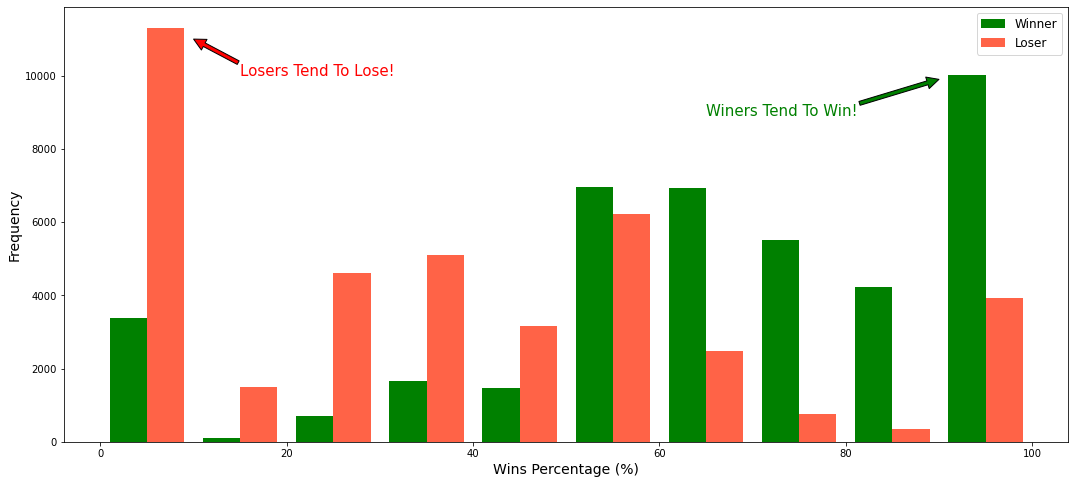

In [14]:
plt.style.use('seaborn-deep')
plt.rcParams["figure.figsize"]= (18,8)
plt.set_loglevel('WARNING')

Winner_wins = tennis_data_plus.select(['Winner winning %']).toPandas()["Winner winning %"]
Loser_wins =tennis_data_plus.select(['Loser winning %']).toPandas()["Loser winning %"]

bins = 10

plt.hist([Winner_wins, Loser_wins], bins, label=['Winner', 'Loser'], color= ("Green", "tomato"))
plt.annotate('Losers Tend To Lose!', xy = (10, 11000), 
             fontsize = 15, xytext = (15, 10000), 
             arrowprops = dict(facecolor = 'red'),
             color = 'red')
plt.annotate('Winers Tend To Win!', xy = (90, 9900), 
             fontsize = 15, xytext = (65, 8900), 
             arrowprops = dict(facecolor = 'green'),
             color = 'green')
plt.xlabel('Wins Percentage (%)',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.legend(loc='upper right', prop={'size': 12})
plt.show()

### Show missing Values Count

In [15]:
for_visualisation=tennis_data_plus.toPandas()
missing_details=((for_visualisation.isnull().sum()/ len(for_visualisation))\
 .round(2) *100)\
 .reset_index(name ='Total')\
 .sort_values(by="Total",ascending=False)
(missing_details[missing_details["Total"]> 40])

,index,Total
37,B&WW,98.0
38,B&WL,98.0
23,L5,97.0
22,W5,97.0
21,L4,91.0
20,W4,91.0
30,GBL,90.0
33,SBW,90.0
29,GBW,90.0
34,SBL,90.0


In [16]:
acceptable_missing_data_percentage=0.4 # %
columns_to_remove =missing_details[missing_details.Total/100 > acceptable_missing_data_percentage]["index"].values.tolist()
print("These Columns must be removed due to the amount of missing data in those columns :")
print(columns_to_remove,end='')

These Columns must be removed due to the amount of missing data in those columns :
['B&WW', 'B&WL', 'L5', 'W5', 'L4', 'W4', 'GBL', 'SBW', 'GBW', 'SBL', 'UBL', 'UBW', 'IWL', 'IWW', 'SJW', 'SJL', 'CBL', 'CBW', 'AvgL', 'AvgW', 'MaxW', 'MaxL', 'W3', 'L3', 'LBW', 'LBL']

In [17]:
def drop_unwanted_columns(data: pd.DataFrame,missing_tol=0.40, to_remove_columns: list=[]) -> pd.DataFrame:
    missing_data_details=((data.isnull().sum()/ len(data)).round(2) *100).reset_index()
    acceptable_missing_data_percentage= 0.40 # more than 25% of data is missing
    missing_data_details.columns=["column_name","percentages"]
    missing_data_details.sort_values(by=["percentages"],ascending=False,inplace=True)
    columns_to_remove =missing_data_details[missing_data_details.percentages/100 > acceptable_missing_data_percentage]["column_name"].values.tolist()
    columns_to_remove = columns_to_remove + to_remove_columns
    return data.drop(columns_to_remove, axis = 1)

tennis_data_eda=drop_unwanted_columns(tennis_data_plus.toPandas())

tennis_data_eda =spark.createDataFrame(tennis_data_eda)
tennis_data_eda.printSchema()

root
 |-- _c0: long (nullable = true)
 |-- ATP: long (nullable = true)
 |-- Location: string (nullable = true)
 |-- Tournament: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Series: string (nullable = true)
 |-- Court: string (nullable = true)
 |-- Surface: string (nullable = true)
 |-- Round: string (nullable = true)
 |-- Best of: long (nullable = true)
 |-- Winner: string (nullable = true)
 |-- Loser: string (nullable = true)
 |-- WRank: string (nullable = true)
 |-- LRank: string (nullable = true)
 |-- W1: double (nullable = true)
 |-- L1: double (nullable = true)
 |-- W2: string (nullable = true)
 |-- L2: string (nullable = true)
 |-- Wsets: double (nullable = true)
 |-- Lsets: string (nullable = true)
 |-- Comment: string (nullable = true)
 |-- B365W: double (nullable = true)
 |-- B365L: double (nullable = true)
 |-- EXW: string (nullable = true)
 |-- EXL: double (nullable = true)
 |-- PSW: double (nullable = true)
 |-- PSL: double (nullable = true)
 |-- WPts: 

# Feature Engineering

#### In order to predict the outcome for each ATP tennis game we need to engineer a new Feature,
#### so we can classify 2 scenarios we choose randomaly  Player 1 and Player 2 where :
- #### Player 1 Won = 1 , Player 2 lost = 0  =>  Result =1
                  OR
- #### Player 1 lost = 0 , Player 2 won = 1 => Result = 0

### since on is the opposite of the other we can simply use the Player 1 only to know who won 
### we can now have a new feature which will tell us the result of the match

In [18]:
engineering_data =tennis_data_eda.toPandas()

In [19]:
engineering_data["Player 1"] =engineering_data.apply(lambda datarow: datarow["Winner"] if datarow["Winner"] > datarow["Loser"] else datarow["Loser"],axis=1)
engineering_data["Player 2"] =engineering_data.apply(lambda datarow: datarow["Winner"] if datarow["Winner"] < datarow["Loser"] else datarow["Loser"],axis=1)
engineering_data["Result"] =engineering_data.apply(lambda datarow: 1 if datarow["Winner"]==datarow["Player 1"] else 0,axis=1)
engineering_data.drop(["Winner","Loser"],axis=1,inplace=True)
tennis_data_final=spark.createDataFrame(engineering_data)

In [20]:
tennis_data_final.toPandas().head()

,_c0,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,...,LPts,winner_number_of_winnings,winner_number_of_losses,loser_number_of_winnings,loser_number_of_losses,Winner winning %,Loser winning %,Player 1,Player 2,Result
0,0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,0,0,0,0,NaN,NaN,Ljubicic I.,Dosedel S.,0
1,1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,0,0,0,0,NaN,NaN,Enqvist T.,Clement A.,1
2,2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,0,0,0,0,NaN,NaN,Escude N.,Baccanello P.,1
3,3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,0,0,0,0,NaN,NaN,Knippschild J.,Federer R.,0
4,4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,0,0,0,0,NaN,NaN,Woodbridge T.,Fromberg R.,0


### |
### |   Target Feature (Records) distributiom not showing any signs of imbalance
### | 
### V 

25696  Records (1) vs Records (1)  26602

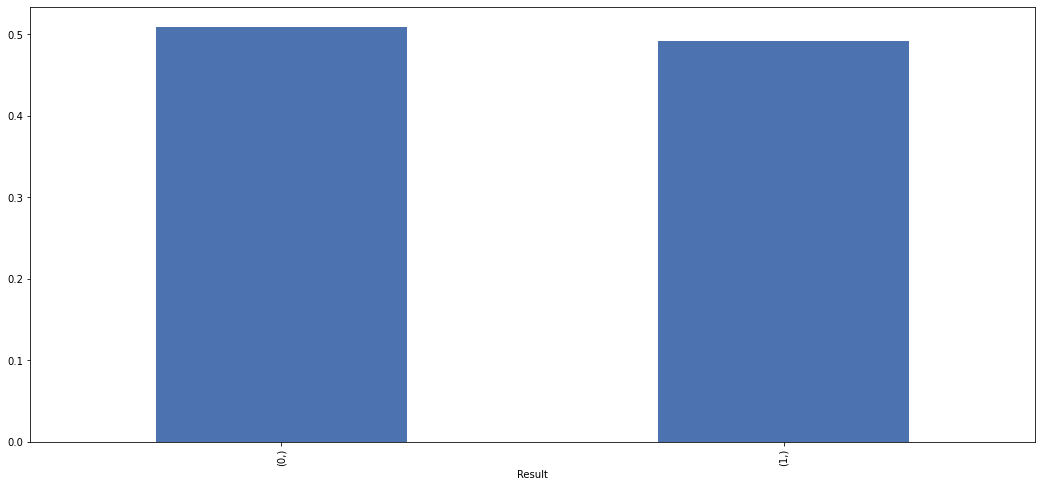

In [21]:
for_visualtization =tennis_data_final.toPandas()
for_visualtization[["Result"]].value_counts(normalize=True).plot(kind="bar")

print( for_visualtization[for_visualtization["Result"] == 1].shape[0] ,\
      " Records (1) vs Records (1) ",\
      for_visualtization[for_visualtization["Result"] == 0].shape[0],end="")

In [22]:
# Sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler,StandardScaler

def feature_engineering(data):
    data.Winner= data.Winner.apply(lambda x: x.strip())
    data.Loser= data.Loser.apply(lambda x: x.strip())
    data["Player 1"] =data.apply(lambda datarow: datarow["Winner"] if datarow["Winner"] > datarow["Loser"] else datarow["Loser"],axis=1)
    data["Player 2"] =data.apply(lambda datarow: datarow["Winner"] if datarow["Winner"] < datarow["Loser"] else datarow["Loser"],axis=1)
    data["Result"] =data.apply(lambda datarow: 1 if datarow["Winner"]==datarow["Player 1"] else 0,axis=1)
    return  data
    
def drop_unwanted_columns(data: pd.DataFrame,missing_tol=0.40, to_remove_columns: list=[]) -> pd.DataFrame:
    missing_data_details=((atp_with_percenatges_data.isnull().sum()/ len(atp_with_percenatges_data)).round(2) *100).reset_index()
    acceptable_missing_data_percentage= 0.40 # more than 25% of data is missing
    missing_data_details.columns=["column_name","percentages"]
    missing_data_details.sort_values(by=["percentages"],ascending=False,inplace=True)
    columns_to_remove =missing_data_details[missing_data_details.percentages/100 > acceptable_missing_data_percentage]["column_name"].values.tolist()
    columns_to_remove = columns_to_remove + to_remove_columns
    return data.drop(columns_to_remove, axis = 1)


def data_split_test_train_validation(data: pd.DataFrame, test_size:int =0.2,rand_state = 42,
                                     validation_size:int =0.2) -> pd.DataFrame:
    # Split Train / Test
    X = data.loc[:, data.columns != "Result"]
    y = data.loc[:, "Result"]
    
    #First Split L between Train and Test 
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size= 1 - test_size,
                                                        random_state = rand_state)
   
    print('train:', len(X_train), 'test:', len(X_test))
    return X_train, X_test,y_train, y_test

def get_columns_with_anomalities(data: pd.DataFrame) -> list:
    """_summary"
    
    Args:
        data (pd.DataFrame): _description_

    Returns:
        list: _description_
    """
    columns_names=[]
    for col in data.columns:
        weird = (data[[col]].applymap(type) != data[[col]].iloc[0].apply(type)).any(axis=1)
        if len(data[weird]) > 0:
            columns_names.append(col)
    return columns_names

def highly_correlated_features(corr: pd.DataFrame.corr,threshold=0.9):
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    # Drop features 
    return to_drop


def fill_features_nulls(data: pd.DataFrame) -> pd.DataFrame:
    
    # Numerical Features
    data_numerical= data.select_dtypes([np.int64]).columns
    for feature in data_numerical:
        data[feature] = data[feature].fillna(int(data[feature].mean()))
    
    # Numerical Float Features
    data_float = data.select_dtypes([np.float64]).columns       
    for feature in data_float:
        data[feature]=data[feature].fillna(data[feature].mean())

    # Categorical Features
    data_categorical = data.select_dtypes(include=['object','O']).columns

    # Date Features
    data_dates = data.select_dtypes(include=['datetime64[ns]']).columns
    
    for column in data_dates:
        data[column] = data[column].replace('', np.nan)
        data[column] = data[column].fillna(data[column].mode()[0])
        data[column] = pd.to_datetime(data[column],errors='coerce')
        data[column].fillna(value=pd.to_datetime('1/1/2015'), inplace=True) 
        data[column] = data[column].dt.strftime('%Y%m%d')
        data[column].dropna(how='all',inplace=True)  
    
    for feature in data_categorical:
        data[feature].interpolate(method ='spline', order=2, inplace=True)
        data[feature].interpolate(method ='linear', limit_area='outside',limit_direction ='both')
        data[feature]= data[feature].dropna(how='all')
        data[feature].dropna(how='all',inplace=True) 
        data[feature]=data[feature].replace(np.nan,151010) 
        
    anomalies  = get_columns_with_anomalities(data)

    for feature in anomalies:
        data[feature]=  pd.to_numeric(data[feature], errors='coerce')
        data[feature].fillna(data[feature].value_counts()[:1].index.tolist()[0],inplace=True)
        data[feature].dropna(how='all',inplace=True)  
    return data



def encode_categorical_features(encoder,data: pd.DataFrame,is_test:bool =False) -> pd.DataFrame:
    data_categorical = data.select_dtypes(include=['object']).columns
    if not is_test :
        encoder.fit(data[data_categorical])
    data[data_categorical]=encoder.transform(data[data_categorical])
    return data

def scale_data(scalar,data: pd.DataFrame,is_test:bool =False) -> pd.DataFrame:
    if not is_test:
        scalar.fit(data)
    return pd.DataFrame(scalar.transform(data),columns = data.columns)


def data_preprocessing(data: pd.DataFrame,encoder,scalar,is_test:bool=False) -> pd.DataFrame:  
    
    # Carefully Selected Features ( after analysis)
    list_of_features = ['Loser winning %', 'L2', 'EXW', 'winner_number_of_winnings', 'L1',
                        'B365L','B365W','EXL', 'Winner winning %', 'PSL', 'LPts',
                        'Location', 'WPts', 'Tournament','ATP', 'WRank', 'LRank', 'Date',
                        'Player 1','Player 2']
    # To remove Columns )

    data =data[list_of_features]
    
    data= fill_features_nulls(data)
    
    data.dropna(how='all',inplace=True)    
    
    data= encode_categorical_features(encoder,data,is_test)
   
    data= scale_data(scalar,data,is_test)
    
    data.fillna(data.mean(),inplace=True)
    
    return data

In [23]:

# split data into Train, Test, and Validation
X_train, X_test,y_train, y_test=data_split_test_train_validation(for_visualtization,test_size=0.2,validation_size=0.2)

train: 41838 test: 10460


In [24]:
X_train=fill_features_nulls(X_train)

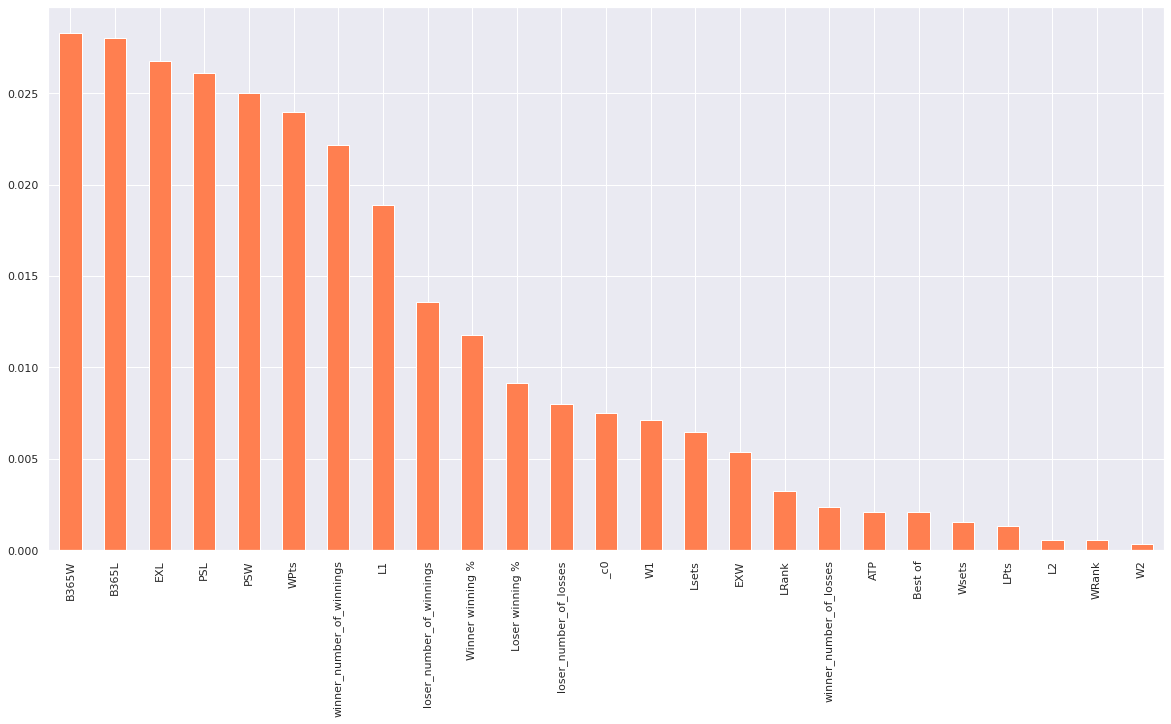

In [25]:
corr_with=X_train.corrwith(y_train).sort_values(ascending=False)
corr_with= np.absolute(corr_with).sort_values(ascending=False)
sns.set(rc = {'figure.figsize':(20,15)})
corr_with.plot.bar(figsize=(20,10),align="center",color='coral')


# we cam see from graph that those columns are the most important
most_relevante_feat= ['Loser winning %', 'L2', 'L1', 
                      'winner_number_of_winnings', 'EXW',
                      'B365L', 'B365W', 'EXL', 'Winner winning %', 
                      'PSW', 'PSL', 'LPts', 'Location', 'Tournament', 
                      'ATP', 'WPts', 'Date', 'LRank', 'WRank',
                      'Player 1', 'Player 2']


Highly Correlated Features (Features q vs Features 2 )  ['L2', 'PSW']


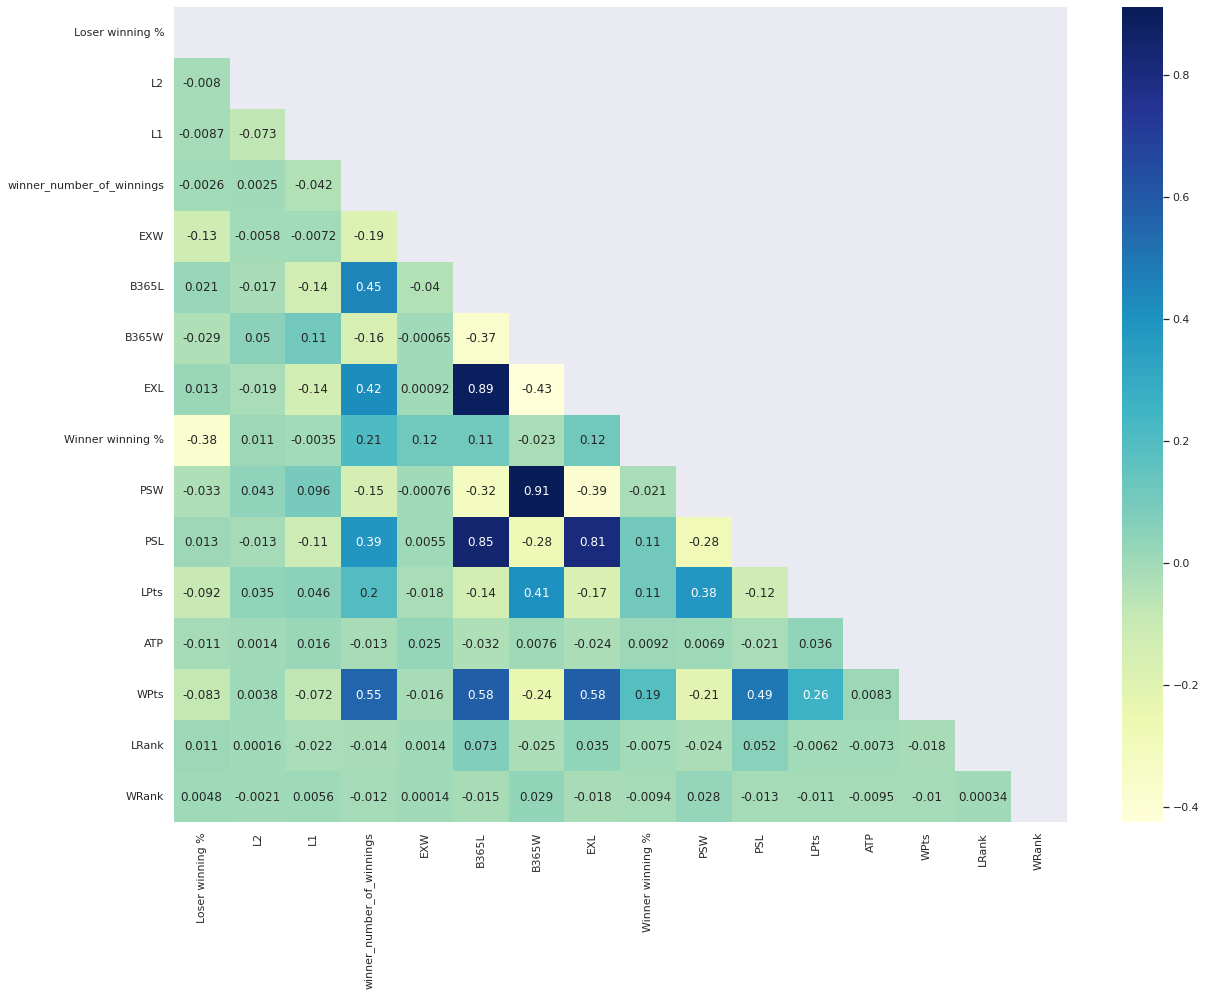

In [26]:
X =X_train[most_relevante_feat]
y=y_train
corr = X.corr()
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(corr,mask=((np.triu(np.ones_like(corr)))),cmap="YlGnBu",annot=True)
highly_corr =highly_correlated_features(X_train.corr())
print("Highly Correlated Features (Features q vs Features 2 ) ", highly_corr)



<AxesSubplot:>

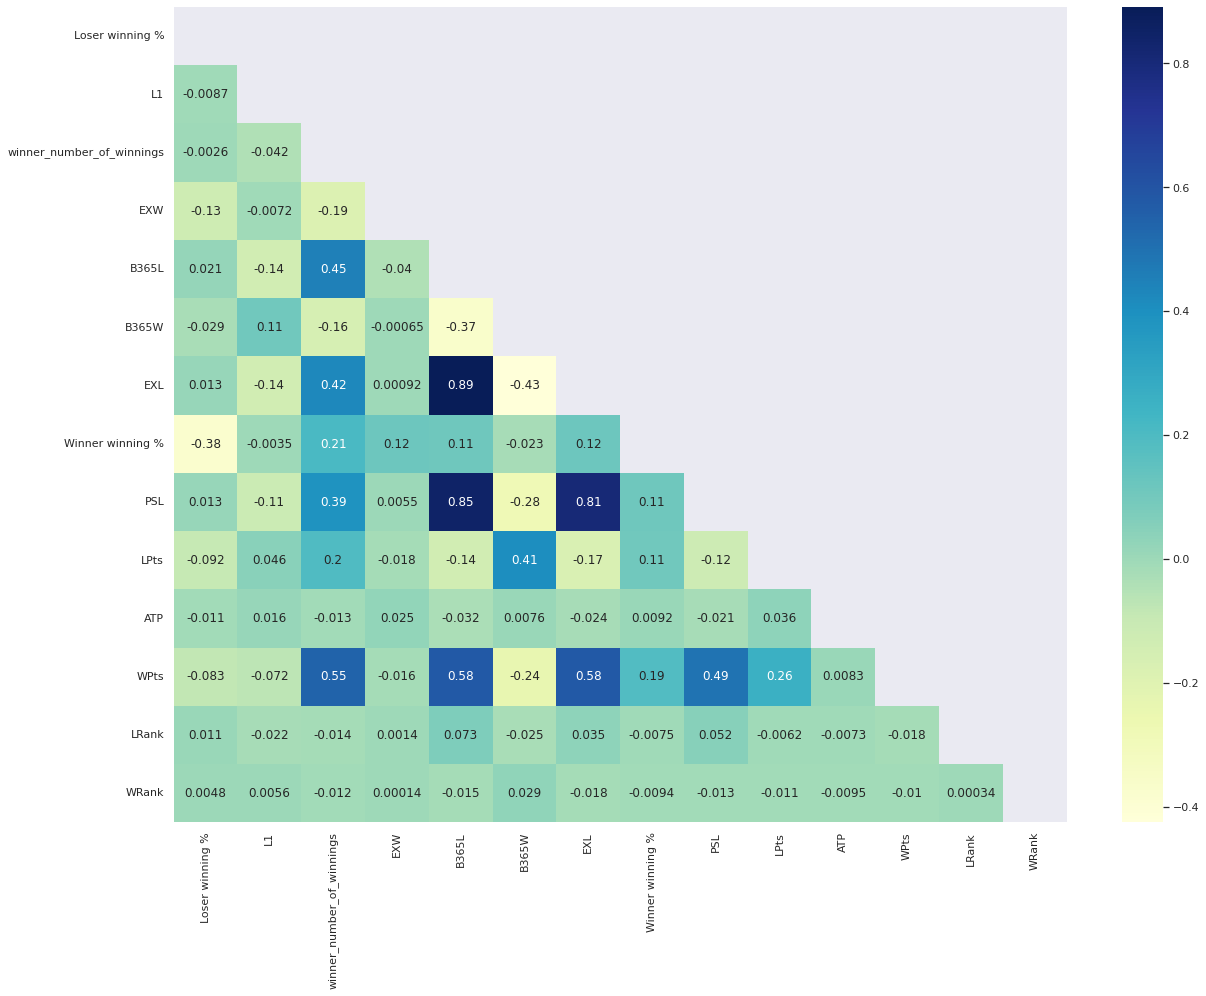

In [27]:
most_relevante_feat_No_corr =[feature for feature in most_relevante_feat if feature not in highly_corr]
X =X_train[most_relevante_feat_No_corr]
y=y_train
corr = X.corr()
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(corr,mask=((np.triu(np.ones_like(corr)))),cmap="YlGnBu",annot=True)

In [28]:
import warnings

warnings.simplefilter("ignore")
#Create Encoder
ordinal = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=np.nan)

#Create Scalar
scalar =StandardScaler()

#Preprocessing(cleaning data and using trained encoders,scalars)
X_train= data_preprocessing(X_train,encoder=ordinal,scalar=scalar,is_test=False)
X_test=data_preprocessing(X_test,encoder=ordinal,scalar=scalar,is_test=True)

### III - Model - Training - Inference - Pipline

In [29]:
X1= pd.concat([X_train, y_train], axis=1, join='inner')
X2= pd.concat([X_test, y_test], axis=1, join='inner')
tennis_scaled =pd.concat([X1, X2], axis=0)
tennis_scaled= spark.createDataFrame(tennis_scaled)

In [30]:
features = most_relevante_feat_No_corr
label ='Result'
train_data,test_data = tennis_scaled.randomSplit([0.7,0.3])

In [31]:
most_relevante_feat_No_corr

['Loser winning %',
 'L1',
 'winner_number_of_winnings',
 'EXW',
 'B365L',
 'B365W',
 'EXL',
 'Winner winning %',
 'PSL',
 'LPts',
 'Location',
 'Tournament',
 'ATP',
 'WPts',
 'Date',
 'LRank',
 'WRank',
 'Player 1',
 'Player 2']

In [32]:
train_data.show(2)

+------------------+--------------------+-------------------+-------------------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+------------------+--------------------+-------------------+------------------+--------------------+--------------------+-------------------+-------------------+--------------------+------+
|   Loser winning %|                  L2|                EXW|winner_number_of_winnings|                L1|             B365L|              B365W|               EXL|   Winner winning %|                 PSL|               LPts|          Location|                WPts|         Tournament|               ATP|               WRank|               LRank|               Date|           Player 1|            Player 2|Result|
+------------------+--------------------+-------------------+-------------------------+------------------+------------------+-------------------+------------------+------

- selecting features with the best corr with the target

In [33]:
from pyspark.ml.feature import StandardScaler,VectorAssembler

# Train scalar and fit training_data
sdf= train_data
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
assembler = VectorAssembler().setInputCols(features).setOutputCol("features")
sdf_transformed = assembler.transform(sdf)
scaler_model = scaler.fit(sdf_transformed.select("features"))
train_scaled = scaler_model.transform(sdf_transformed)
train_scaled.show(1)

+------------------+--------------------+------------------+-------------------------+------------------+-----------------+-------------------+-----------------+------------------+--------------------+-------------------+------------------+-----------------+-------------------+------------------+--------------------+--------------------+-------------------+-------------------+-------------------+------+--------------------+--------------------+
|   Loser winning %|                  L2|               EXW|winner_number_of_winnings|                L1|            B365L|              B365W|              EXL|  Winner winning %|                 PSL|               LPts|          Location|             WPts|         Tournament|               ATP|               WRank|               LRank|               Date|           Player 1|           Player 2|Result|            features|      scaledFeatures|
+------------------+--------------------+------------------+-------------------------+----------------

In [34]:
# use the Fittted Scalar to Scale Test data
sdf= test_data
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
assembler = VectorAssembler().setInputCols(features).setOutputCol("features")
sdf_transformed = assembler.transform(sdf)
test_scaled = scaler_model.transform(sdf_transformed)
test_scaled.show(1)

+------------------+--------------------+-------------------+-------------------------+------------------+-----------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+-----------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+------+--------------------+--------------------+
|   Loser winning %|                  L2|                EXW|winner_number_of_winnings|                L1|            B365L|              B365W|               EXL|  Winner winning %|               PSL|               LPts|           Location|             WPts|       Tournament|                 ATP|               WRank|               LRank|               Date|            Player 1|           Player 2|Result|            features|      scaledFeatures|
+------------------+--------------------+-------------------+-------------------------+-----------

In [35]:
train_scaled.toPandas().iloc[:,-2]

0        [-1.318768578252234, -2.201119041942028, -0.43...
1        [-1.318768578252234, -1.658307519925733, -0.43...
2        [-1.318768578252234, 1.5985616121720356, -0.43...
3        [-1.318768578252234, 1.0557500901557408, -0.30...
4        [-1.318768578252234, -0.5726844758931435, -0.3...
                               ...                        
24847    [2.4111868910464325, -1.1154959979094383, 0.84...
24848    [2.4111868910464325, -1.658307519925733, -0.56...
24849    [2.4111868910464325, -0.5726844758931435, -0.5...
24850    [2.4111868910464325, -1.658307519925733, -0.56...
24851    [2.4111868910464325, -1.1154959979094383, -0.0...
Name: features, Length: 24852, dtype: object

## Model : Decision Tree Classifier

In [36]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.util import MLUtils

labelIndexer = StringIndexer(inputCol="Result", outputCol="indexedLabel").fit(train_scaled)

featureIndexer =\
    VectorIndexer(inputCol="scaledFeatures", outputCol="indexedFeatures", maxCategories=10).fit(train_scaled)

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",maxDepth=16, maxBins=20)

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(train_scaled)

# Make predictions.
predictions = model.transform(test_scaled)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(6)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print ("Test Error = %g" % (1.0 - accuracy))

treeModel = model.stages[2]
print(treeModel) # summary only


+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       1.0|         1.0|[-1.3187685782522...|
|       1.0|         0.0|[-1.3187685782522...|
|       0.0|         1.0|[-1.3187685782522...|
|       1.0|         0.0|[-1.3187685782522...|
|       1.0|         0.0|[-1.3187685782522...|
|       1.0|         0.0|[-1.3187685782522...|
+----------+------------+--------------------+
only showing top 6 rows

Test Error = 0.506331
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_b085dea02b8c, depth=16, numNodes=5601, numClasses=2, numFeatures=19


## Model : Random forest Classifier

In [37]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Result", outputCol="indexedLabel").fit(train_scaled)

# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(train_scaled)

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=30)

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])

# Train model.  This also runs the indexers.
model = pipeline.fit(train_scaled)

# Make predictions.
predictions = model.transform(test_scaled)

# Select example rows to display.
predictions.select("predictedLabel", "indexedLabel", "indexedFeatures").show(6)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

rfModel = model.stages[2]
print(rfModel)  # summary only

+--------------+------------+--------------------+
|predictedLabel|indexedLabel|     indexedFeatures|
+--------------+------------+--------------------+
|             0|         1.0|[-1.3187685782522...|
|             0|         0.0|[-1.3187685782522...|
|             1|         1.0|[-1.3187685782522...|
|             0|         0.0|[-1.3187685782522...|
|             0|         0.0|[-1.3187685782522...|
|             0|         0.0|[-1.3187685782522...|
+--------------+------------+--------------------+
only showing top 6 rows

Test Error = 0.494227
RandomForestClassificationModel: uid=RandomForestClassifier_90c3c4778797, numTrees=30, numClasses=2, numFeatures=19


## Possible  Improvements

- Hyper-parameters tuning 

- Merging the Weather Dataset that matches our dataset would make it more intresting ( we can check players performance unde the Sun !)

- Merging the Injuries and Hospitilisation Dataset that matches our dataset would make it more intresting ( we can check players performance unde the Sun !)

- Dealing differently with Data Anamolies, we cam make more in-depth cleaning of the data and more accurate feature engineering.